In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

(480, 640, 3)

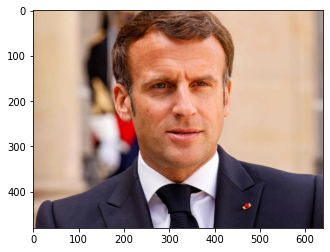

In [2]:
image = cv2.imread('./images/images_capture/opencv_frame_-1.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
image.shape

198 66 262 262
milieu du crop : (329.0,197.0)
distance du visage : 0.3404580152671756


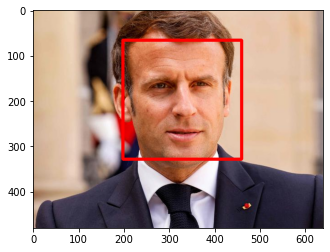

In [3]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(image, scaleFactor = 1.1, minNeighbors = 5)
for (ex,ey,ew,eh) in faces:
            cv2.rectangle(image,(ex,ey),(ex+ew,ey+eh),(255,0,0),5)
            print(ex,ey,eh,ew)
milieu_crop_y = ey+eh/2
milieu_crop_x = ex+ew/2
print('milieu du crop : ('+str(milieu_crop_x)+','+str(milieu_crop_y)+')')
distance_visage = 223/((eh+ew)/2)*0.4
print('distance du visage : '+str(distance_visage))
plt.imshow(image)

(262, 262, 3)


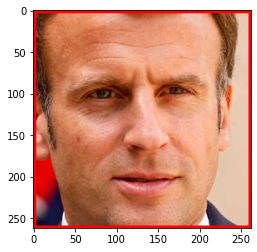

In [4]:
image = image[ey:ey+eh, ex:ex+ew]
plt.imshow(image)
print(image.shape)

133 65 65 65
48 68 69 69
[133, 65, 65, 65, 48, 68, 69, 69]


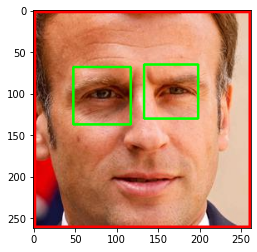

In [5]:
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
eyes_array = []
eyes = eye_cascade.detectMultiScale(image, scaleFactor = 1.1, minNeighbors = 5)
for (eex,eey,eew,eeh) in eyes:
    if eey < image.shape[0]/2:
        cv2.rectangle(image,(eex,eey),(eex+eew,eey+eeh),(0,255,0),2) 
        print(eex,eey,eeh,eew)
        eyes_array.append(eex)
        eyes_array.append(eey)
        eyes_array.append(eew)
        eyes_array.append(eeh)
image.shape
plt.imshow(image)
#img_crop2 = img_crop[ey:ey+eh, ex:ex+ew]
#plt.imshow(img_crop2);
#print(img_crop2.shape)
print(eyes_array)

In [ ]:
# all in one
file = open('./images/images_capture_crop/ref-crop.txt','w') 
path = './images/images_capture'
arr = os.listdir(path)
for i in range (0, len(arr)):
    image = cv2.imread(path+'/'+arr[i])
    print(arr[i])
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    #plt.imshow(image)
    #image.shape
    name = 'midcrop-'

    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(image, scaleFactor = 1.1, minNeighbors = 5)
    for (ex,ey,ew,eh) in faces:
                cv2.rectangle(image,(ex,ey),(ex+ew,ey+eh),(255,0,0),5)
                print(ex,ey,eh,ew)
    milieu_crop_y = ey+eh/2
    milieu_crop_x = ex+ew/2
    print('milieu du crop  ('+str(milieu_crop_x)+','+str(milieu_crop_y)+')')
    name = name+str(milieu_crop_x)+','+str(milieu_crop_y)
    distance_visage = 223/((eh+ew)/2)*0.4
    distance_visage = float("{:.5f}".format(distance_visage))
    print('distance du visage  '+str(distance_visage))
    name = name+'-dist-'+str(distance_visage)
    #plt.imshow(image)

    image = image[ey:ey+eh, ex:ex+ew]
    #plt.imshow(image)
    #print(image.shape)

    eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
    eyes_array = []
    eyes = eye_cascade.detectMultiScale(image, scaleFactor = 1.1, minNeighbors = 5)
    for (eex,eey,eew,eeh) in eyes:
        if eey < image.shape[0]/2:
            cv2.rectangle(image,(eex,eey),(eex+eew,eey+eeh),(0,255,0),2) 
            #print(eex,eey,eeh,eew, end='')
            eyes_array.append(eex)
            eyes_array.append(eey)
            eyes_array.append(eew)
            eyes_array.append(eeh)
    #image.shape
    #plt.imshow(image)
    #img_crop2 = img_crop[ey:ey+eh, ex:ex+ew]
    #plt.imshow(img_crop2);
    #print(img_crop2.shape)
    print(eyes_array)
    if eyes_array[0] > eyes_array[4]:  
        #right-left
        middle_left_x = ex+eyes_array[4]+eyes_array[6]/2
        middle_left_y = ey+eyes_array[5]+eyes_array[7]/2
        middle_right_x = ex+eyes_array[0]+eyes_array[2]/2
        middle_right_y = ey+eyes_array[1]+eyes_array[3]/2
        name_gauche = name+'-mideye-'+str(middle_left_x)+','+str(middle_left_y)
        name_droit = name+'-mideye-'+str(middle_right_x)+','+str(middle_right_y)
        img_crop2 = image[eyes_array[1]:eyes_array[1]+eyes_array[3]+1, eyes_array[0]:eyes_array[0]+eyes_array[2]+1]
        img_crop1 = image[eyes_array[5]:eyes_array[5]+eyes_array[7]+1, eyes_array[4]:eyes_array[4]+eyes_array[6]+1]
    else :
        #left-right
        middle_right_x = ex+eyes_array[4]+eyes_array[6]/2
        middle_right_y = ey+eyes_array[5]+eyes_array[7]/2
        middle_left_x = ex+eyes_array[0]+eyes_array[1]/2
        middle_left_y = ey+eyes_array[2]+eyes_array[3]/2
        name_gauche = name+'-mideye-'+str(middle_left_x)+','+str(middle_left_y)
        name_droit = name+'-mideye-'+str(middle_right_x)+','+str(middle_right_y)
        img_crop1 = image[eyes_array[1]:eyes_array[1]+eyes_array[3]+1, eyes_array[0]:eyes_array[0]+eyes_array[2]+1]
        img_crop2 = image[eyes_array[5]:eyes_array[5]+eyes_array[7]+1, eyes_array[4]:eyes_array[4]+eyes_array[6]+1]

    print(img_crop1.shape)
    print(img_crop2.shape)
    name_gauche = name_gauche+'-shape-'+str(img_crop1.shape)
    name_droit = name_droit+'-shape-'+str(img_crop2.shape)
    #plt.figure()
    print('oeuil gauche, milieu ''('+str(middle_left_x)+','+str(middle_left_y)+')')
    #plt.imshow(img_crop1)
    #plt.figure()
    print('oeuil droit, milieu ''('+str(middle_right_x)+','+str(middle_right_y)+')')
    #plt.imshow(img_crop2)


    image_gray1 = cv2.cvtColor(img_crop1, cv2.COLOR_BGR2GRAY)
    image_gray2 = cv2.cvtColor(img_crop2, cv2.COLOR_BGR2GRAY)
    #cv2.imwrite('./images/test/opencv_frame_'+str(i)+'a-'+name_gauche+'-gauche.png', image_gray1)
    #cv2.imwrite('./images/test/opencv_frame_'+str(i)+'a-'+name_droit+'-droit.png', image_gray2)
    cv2.imwrite('./images/images_capture_crop/'+str(arr[i][0:arr[i].find('.png')])+'-gauche.png', image_gray1)
    cv2.imwrite('./images/images_capture_crop/'+str(arr[i][0:arr[i].find('.png')])+'-droit.png', image_gray2)
    file.write(str(arr[i][0:arr[i].find('.png')])+'_'+name_gauche+'-gauche.png\n') 
    file.write(str(arr[i][0:arr[i].find('.png')])+'_'+name_droit+'-droit.png\n') 
 
file.close() 